In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


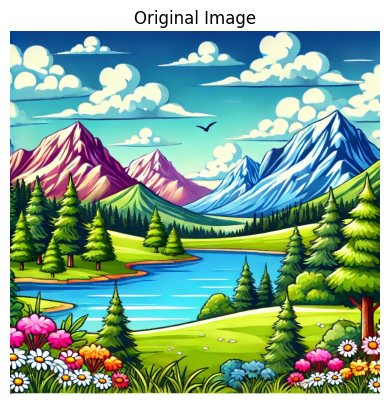

In [10]:
image_path = r"C:\Users\vedha\OneDrive\Desktop\Assignment - 4\Assignment_Image.jpeg.jpg"

# Load image (OpenCV loads in BGR format)
img_bgr = cv2.imread(image_path)

# Check if image loaded
if img_bgr is None:
    print("❌ Error: Image not found. Check path again.")
else:
    # Convert to RGB for display
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Original Image")
    plt.show()


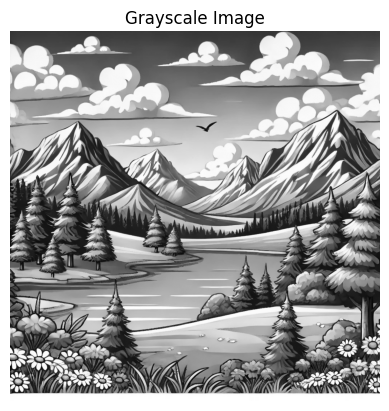

In [3]:
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()


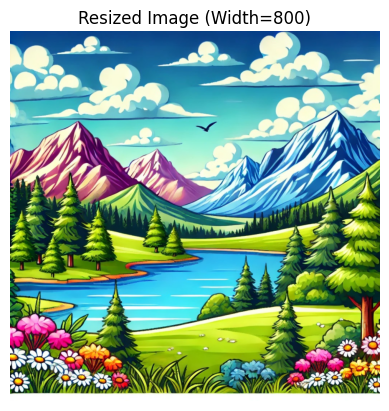

In [4]:
def resize_aspect(image, width=None, height=None, inter=cv2.INTER_AREA):
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is not None:
        r = width / float(w)
        dim = (width, int(h * r))
    else:
        r = height / float(h)
        dim = (int(w * r), height)
    return cv2.resize(image, dim, interpolation=inter)

resized = resize_aspect(img_rgb, width=800)

plt.imshow(resized)
plt.axis("off")
plt.title("Resized Image (Width=800)")
plt.show()


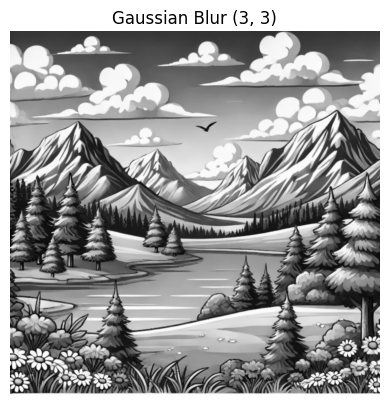

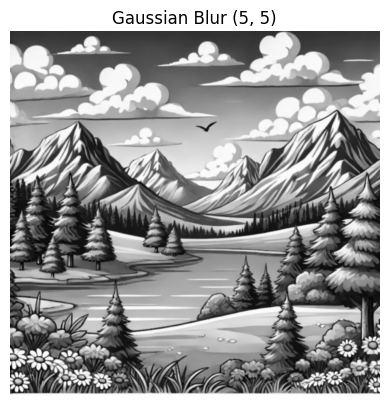

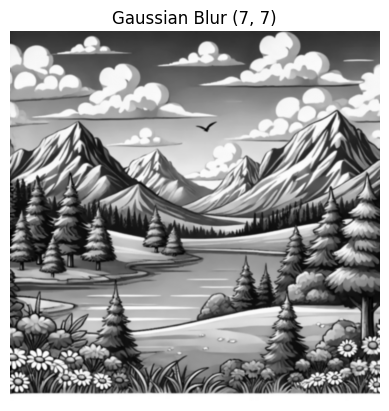

In [5]:
for k in [(3,3), (5,5), (7,7)]:
    blurred = cv2.GaussianBlur(gray, k, 0)
    plt.imshow(blurred, cmap="gray")
    plt.axis("off")
    plt.title(f"Gaussian Blur {k}")
    plt.show()


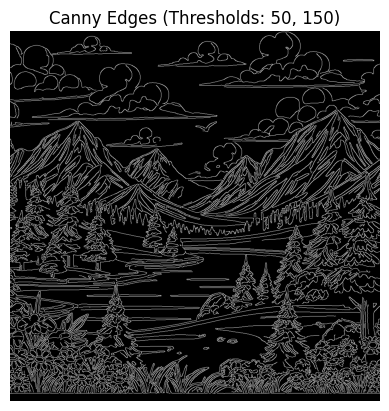

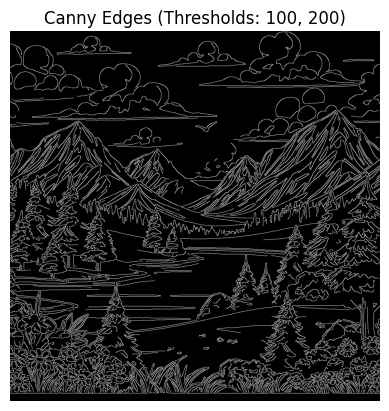

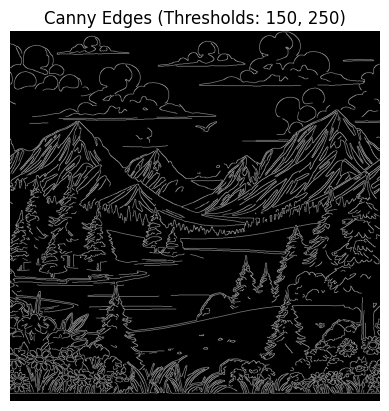

In [6]:
blur_for_canny = cv2.GaussianBlur(gray, (5,5), 0)

for t1, t2 in [(50,150), (100,200), (150,250)]:
    edges = cv2.Canny(blur_for_canny, t1, t2)
    plt.imshow(edges, cmap="gray")
    plt.axis("off")
    plt.title(f"Canny Edges (Thresholds: {t1}, {t2})")
    plt.show()


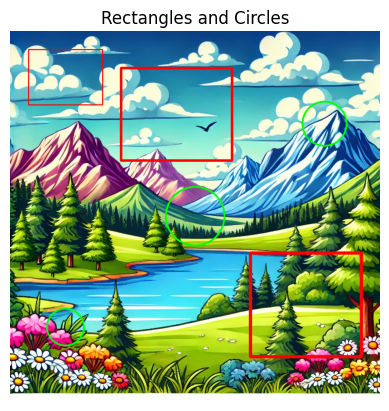

In [8]:
shapes_img = img_rgb.copy()
h, w = shapes_img.shape[:2]

# Rectangles (x1,y1,x2,y2,thickness)
rectangles = [
    (int(0.05*w), int(0.05*h), int(0.25*w), int(0.20*h), 2),
    (int(0.30*w), int(0.10*h), int(0.60*w), int(0.35*h), 5),
    (int(0.65*w), int(0.60*h), int(0.95*w), int(0.88*h), 8)
]
for x1, y1, x2, y2, th in rectangles:
    cv2.rectangle(shapes_img, (x1,y1), (x2,y2), (255,0,0), th)  # Red

# Circles (cx, cy, radius)
circles = [
    (int(0.15*w), int(0.80*h), int(0.05*min(w,h))),
    (int(0.50*w), int(0.50*h), int(0.08*min(w,h))),
    (int(0.85*w), int(0.25*h), int(0.06*min(w,h)))
]
for cx, cy, r in circles:
    cv2.circle(shapes_img, (cx,cy), r, (0,255,0), 4)  # Green

plt.imshow(shapes_img)
plt.axis("off")
plt.title("Rectangles and Circles")
plt.show()


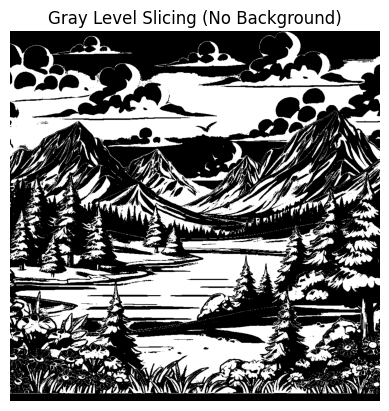

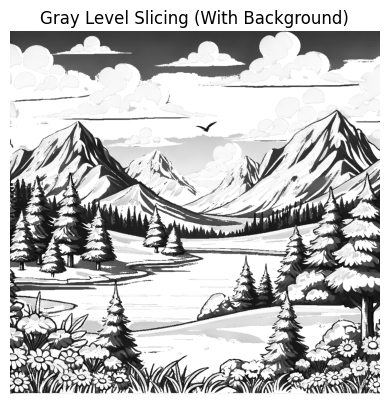

In [9]:
low, high = 100, 200

# Without background preservation
sliced_no_bg = np.zeros_like(gray)
mask = (gray >= low) & (gray <= high)
sliced_no_bg[mask] = 255

plt.imshow(sliced_no_bg, cmap="gray")
plt.axis("off")
plt.title("Gray Level Slicing (No Background)")
plt.show()

# With background preservation
sliced_preserve_bg = gray.copy()
sliced_preserve_bg[mask] = 255

plt.imshow(sliced_preserve_bg, cmap="gray")
plt.axis("off")
plt.title("Gray Level Slicing (With Background)")
plt.show()
